In [1]:
#import package
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pylab as plt
import time

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import optimizers

%matplotlib inline

print('Done')

Using TensorFlow backend.


Done


In [111]:
def readData():
    data = pd.read_csv('C:/Users/yoon/Python/Stock_Prediction/sensex_DIV.csv', parse_dates = [0])
    raw_dates = data.loc[30:, 'date'].reset_index(drop=True)
    del data['date']
    raw_data = data.loc[30:].reset_index(drop=True)
    return raw_data, raw_dates

def split_into_chunks(data, train, predict, step):
    train_set, label_set = [], []
    for i in range(0, len(data), step):
        try:
            temp_train = data.loc[i:i+train-1, 'dSMA':'dCCI'].as_matrix()
            temp_label = data.loc[i+train-1+predict, 'return']
            if temp_label >= 0:
                temp_label = 1.0
            else:
                temp_label = 0.0
        except:
            break
        train_set.append(temp_train)
        label_set.append(temp_label)
    return train_set, label_set

def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

"""def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)
    return a, b"""

def create_Xt_Yt(X, y, percentage=0.5):
    X_train = X[0:int(len(X) * percentage)]
    Y_train = y[0:int(len(y) * percentage)]
    X_train, Y_train = shuffle_in_unison(X_train, Y_train)
    X_test = X[int(len(X) * percentage):]
    Y_test = y[int(len(X) * percentage):]
    return X_train, X_test, Y_train, Y_test

print('Done')

Done


In [112]:
timeSeriesList, dates = readData()
DATA_SIZE_ON_TRAIN = 1
TARGET_TIME = 1
STEP_SIZE = 1

print('Done')

Done


In [113]:
X, Y = split_into_chunks(timeSeriesList, DATA_SIZE_ON_TRAIN, TARGET_TIME, STEP_SIZE)
X, Y = np.array(X), np.array(Y)
X = X.reshape(-1, DATA_SIZE_ON_TRAIN * 10)
X_train, X_test, Y_train, Y_test = create_Xt_Yt(X, Y, percentage=0.5)
print('Done')

Done


In [115]:
model = Sequential()
model.add(Dense(30, input_dim = DATA_SIZE_ON_TRAIN * 10))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
        
sgd = optimizers.SGD(lr=0.1, momentum=0.3)
model.compile(optimizer=sgd,
                    loss='mse',
                    metrics=['accuracy'])

print('Training')
model.fit(X_train, 
            Y_train, 
            epochs=100,
            batch_size = 128,
            verbose=1)

print('Evaluating')
score = model.evaluate(X_test, Y_test, batch_size=128)
print("\nTest loss and accuracy:" + str(score))

print('Done')

Training
Epoch 1/100
1300/1300 [==============================] - 1s - loss: 0.2563 - acc: 0.5492     
Epoch 2/100
1300/1300 [==============================] - 0s - loss: 0.2478 - acc: 0.5715     
Epoch 3/100
1300/1300 [==============================] - 0s - loss: 0.2429 - acc: 0.5738     
Epoch 4/100
1300/1300 [==============================] - 0s - loss: 0.2404 - acc: 0.5877     
Epoch 5/100
1300/1300 [==============================] - 0s - loss: 0.2394 - acc: 0.5962     
Epoch 6/100
1300/1300 [==============================] - 0s - loss: 0.2383 - acc: 0.5977     
Epoch 7/100
1300/1300 [==============================] - 0s - loss: 0.2374 - acc: 0.5985     
Epoch 8/100
1300/1300 [==============================] - 0s - loss: 0.2373 - acc: 0.5946     
Epoch 9/100
1300/1300 [==============================] - 0s - loss: 0.2365 - acc: 0.6000     
Epoch 10/100
1300/1300 [==============================] - 0s - loss: 0.2365 - acc: 0.5985     
Epoch 11/100
1300/1300 [==========================

1300/1300 [==============================] - 0s - loss: 0.2317 - acc: 0.6038     
Epoch 86/100
1300/1300 [==============================] - 0s - loss: 0.2317 - acc: 0.6077     
Epoch 87/100
1300/1300 [==============================] - 0s - loss: 0.2316 - acc: 0.6046     
Epoch 88/100
1300/1300 [==============================] - 0s - loss: 0.2315 - acc: 0.6046     
Epoch 89/100
1300/1300 [==============================] - 0s - loss: 0.2315 - acc: 0.6115     
Epoch 90/100
1300/1300 [==============================] - 0s - loss: 0.2315 - acc: 0.6054     
Epoch 91/100
1300/1300 [==============================] - ETA: 0s - loss: 0.2308 - acc: 0.608 - 0s - loss: 0.2317 - acc: 0.6115     
Epoch 92/100
1300/1300 [==============================] - 0s - loss: 0.2312 - acc: 0.6046     
Epoch 93/100
1300/1300 [==============================] - 0s - loss: 0.2313 - acc: 0.6046     
Epoch 94/100
1300/1300 [==============================] - 0s - loss: 0.2312 - acc: 0.6069     
Epoch 95/100
1300/1300 [=

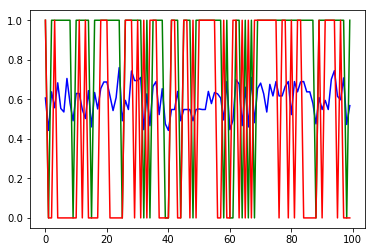

In [98]:
predicted = model.predict(X_test)
plt.plot(predicted[:100], color='blue')
plt.plot(predicted[:100].round(), color='green')
plt.plot(Y_test[:100], color='red')